# Introduction to Scikit-Learn (sklearn)

This notebook deonstrates some of the most useful functions of the beautiful Scikit-Learn library.

What we're going to cover:
0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 0. An end-to-end Scikit-Learn workflow

In [2]:
# 1. Get the data ready
heart_disease = pd.read_csv('data/heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# create X (features matrix)
X = heart_disease.drop('target', axis=1)

# create y (labels)
y = heart_disease['target']

In [4]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
clf.fit(X_train, y_train);

In [7]:
# make a prediction
# y_label = clf.predict(np.array([0, 2, 3, 4]))

In [8]:
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0])

In [9]:
y_test

250    0
220    0
75     1
209    0
208    0
      ..
219    0
18     1
164    1
268    0
173    0
Name: target, Length: 61, dtype: int64

In [10]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train, y_train)

1.0

In [11]:
clf.score(X_test, y_test)

0.8360655737704918

In [12]:
y_train

193    0
294    0
205    0
214    0
190    0
      ..
139    1
46     1
200    0
71     1
3      1
Name: target, Length: 242, dtype: int64

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85        36
           1       0.74      0.92      0.82        25

    accuracy                           0.84        61
   macro avg       0.84      0.85      0.83        61
weighted avg       0.85      0.84      0.84        61



In [14]:
confusion_matrix(y_test, y_preds)

array([[28,  8],
       [ 2, 23]])

In [15]:
accuracy_score(y_test, y_preds)

0.8360655737704918

In [16]:
# 5. Improve a model
# try different amount of n_estimators

np.random.seed(42)
for i in range(10, 100, 10):
    print(f'Trying model with {i} estimators...')
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f'Model accuracy on test set: {clf.score(X_test, y_test)*100:.2f}%')
    print()

Trying model with 10 estimators...
Model accuracy on test set: 83.61%

Trying model with 20 estimators...
Model accuracy on test set: 81.97%

Trying model with 30 estimators...
Model accuracy on test set: 78.69%

Trying model with 40 estimators...
Model accuracy on test set: 80.33%

Trying model with 50 estimators...
Model accuracy on test set: 75.41%

Trying model with 60 estimators...
Model accuracy on test set: 81.97%

Trying model with 70 estimators...
Model accuracy on test set: 83.61%

Trying model with 80 estimators...
Model accuracy on test set: 77.05%

Trying model with 90 estimators...
Model accuracy on test set: 80.33%



In [17]:
# 6. Save a model and oad it
import pickle

pickle.dump(clf, open('random_forest_model_1.pkl', 'wb'))

In [18]:
loaded_model = pickle.load(open('random_forest_model_1.pkl', 'rb'))
loaded_model.score(X_test, y_test)

0.8032786885245902

## 1. Getting our data ready to be used with machine learning

Three main things we have to do:
    1. Split the data into features and labels (usually X & y)
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values (feature encoding)

In [19]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
X = heart_disease.drop('target', axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [21]:
y = heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [22]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [24]:
X.shape

(303, 13)

### 1.1 Make sure it's all numerical

In [25]:
car_sales = pd.read_csv('data/car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [30]:
car_sales['Doors'].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [27]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [28]:
# split into X/y
X = car_sales.drop('Price', axis=1)
y = car_sales['Price']

# split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
# build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [31]:
# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)],
                               remainder='passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [32]:
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


In [33]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [34]:
dummies = pd.get_dummies(car_sales[['Make', 'Colour', 'Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [35]:
# refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [36]:
model.score(X_test, y_test)

0.3235867221569877

### 1.2 Dealing with missing values

1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data altogether.

In [37]:
# import car sales missing data
car_sales_missing = pd.read_csv('data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [38]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [39]:
# create X and y
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [40]:
# convert the data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)],
                               remainder='passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X

ValueError: Input contains NaN

In [41]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


### Option 1: Fill missing data with Pandas

In [45]:
# fill the 'Make' column
car_sales_missing['Make'].fillna('missing', inplace=True)

# fill the 'Colour' colummn
car_sales_missing['Colour'].fillna('missing', inplace=True)

# fill the 'Odometer (KM)' column
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace=True)

# fill the 'Doors' column
car_sales_missing['Doors'].fillna(4, inplace=True)

In [46]:
# check the dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [47]:
# remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [48]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [49]:
len(car_sales_missing) # 1000-50

950

In [50]:
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [52]:
# convert the data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)],
                               remainder='passthrough')
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [54]:
transformed_X[0]

array([0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 3.5431e+04,
       1.5323e+04])

### 1.2.2 Filling missing data and transforming categorical data with Scikit-Learn

Now we've filled the missing columns using pandas functions, you might be thinking, "Why pandas? I thought this was a Scikit-Learn introduction?".

Not to worry, scikit-learn provides another method called `SimpleImputer()` which allows us to do a similar thing.

`SimpleImputer()` transforms data by filling missing values with a given strategy.

And we can use it to fill the missing values in our DataFrame as above.

At the moment, our dataframe has no missing values.

In [55]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [57]:
car_sales_missing = pd.read_csv('data/car-sales-extended-missing-data.csv')
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [60]:
# drop the rows with missing in the 'Price' column
car_sales_missing.dropna(subset=["Price"], inplace=True)

In [61]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [62]:
# split into X and y
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

# split data into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Note: We split data into train & test to perform filling missing values on them separately.

In [64]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [66]:
# fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# define columns
cat_features = ['Make', 'Colour']
door_feature = ['Doors']
num_feature = ['Odometer (KM)']

# create and imputer (something that fills missing data)
imputer = ColumnTransformer([
    ('cat_imputer', cat_imputer, cat_features),
    ('door_imputer', door_imputer, door_feature),
    ('num_imputer', num_imputer, num_feature)
])

# transform the data
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)

# check filled X_train
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [67]:
# get the transformed data array's back into DataFrame's
car_sales_filled_train = pd.DataFrame(filled_X_train, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_X_test, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# check missing data in training set
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [68]:
# Check to see the original... still missing values
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [69]:
# one hot encode the features with the same code as before 
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train)
transformed_X_test = transformer.transform(car_sales_filled_test)

# check transformed and filled X_train
transformed_X_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [70]:
# now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_X_train, y_train) # found some patterns in this training dataset
model.score(transformed_X_test, y_test) # evaluate those patterns on this test dataset

0.21229043336119102

The key takeaways to remember are:

* Most datasets you come across won't be in a form ready to immediately start using them with machine learning models. And some may take more preparation than others to get ready to use.
* For most machine learning models, your data has to be numerical. This will involve converting whatever you're working with into numbers. This process is often referred to as <b>feature engineering</b> or <b>feature encoding</b>.
* Some machine learning models aren't compatible with missing data. The process of filling missing data is referred to as <b>data imputation</b>.

## 2. Choosing the right estimator/algorithm for your problem

Scikit-Learn uses estimator as another term for machine learning model or algorithm.

Some things to note:

* Sklearn refers to machine learning models and algorithms as estimators.
* Classification problem - predicting a category (heart disease or not).
    * Sometimes you'll see clf (short for classifier) used as a classification estimator instance's variable name.
* Regression problem - predicting a number (selling price of a car).
* Unsupervised problem - clustering (grouping unlabelled samples with other similar unlabelled samples).

<img src="images/ml_map.png" width=700/>

### 2.1 Picking a machine learning model for a regression problem

In [74]:
# import Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston;

In [75]:
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [76]:
# how many samples?
len(boston_df)

506

Our goal here is to use the feature columns, such as CRIM, which is the per capita crime rate by town, AGE, the proportion of owner-occupied units built prior to 1940 and more to predict the target column. Where the target column is the median house prices.

In essence, each row is a different town in Boston (the data) and we're trying to build a model to predict the median house price (the label) of a town given a series of attributes about the town.

Since we have data and labels, this is a supervised learning problem. And since we're trying to predict a number, it's a regression problem.

Following the map through, knowing what we know, it suggests that we try RidgeRegression.

In [77]:
# import the Ridge model class from the linear_model module
from sklearn.linear_model import Ridge

# setup random seed
np.random.seed(42)

# create the data
X = boston_df.drop('target', axis=1)
y = boston_df['target']

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate and fit the Ridge model (on the training set)
model = Ridge()
model.fit(X_train, y_train) # ask our model to find the patterns between X_train and y_train

# check the score of the Ridge model (on the test set)
model.score(X_test, y_test)

0.6662221670168522

How do we improve this score? What if RidgeRegression wasn't working?

Check the map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

Following the diagram, the next step would be to try EnsembleRegressors. Ensemble is another word for multiple models put together to make a decision.

One of the most common and useful ensemble methods is the Random Forest. Known for its fast training and prediction times and adaptibility to different problems.

The basic premise of the Random Forest is to combine a number of different decision trees, each one random from the other and make a prediction on a sample by averaging the result of each decision tree.

An in-depth discussion of the Random Forest algorithm is beyond the scope of this notebook but if you're interested in learning more, [An Implementation and Explanation of the Random Forest in Python by Will Koehrsen](https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76) is a great read.

Since we're working with regression, we'll use Scikit-Learn's RandomForestRegressor.

We can use the exact same workflow as above. Except for changing the model.

In [79]:
# import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# setup random seed
np.random.seed(42)

# create the data
X = boston_df.drop('target', axis=1)
y = boston_df['target']

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate and fit the RandomForestRegressor model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train) # ask our model to find the patterns between X_train and y_train

# check the score of the RandomForestRegressor model (on the test set)
model.score(X_test, y_test)

0.873969014117403

### 2.2 Picking a machine learning model for a classification problem

Say you were trying to predict whether or not a patient had heart disease based on their medical records.

The dataset in ../data/heart-disease.csv contains data for just that problem.

In [80]:
heart_disease = pd.read_csv('data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [81]:
# how many samples?
len(heart_disease)

303

Similar to the Boston housing dataset, here we want to use all of the available data to predict the target column (1 for if a patient has heart disease and 0 for if they don't).

So what do we know?

We've got 303 samples (1 row = 1 sample) and we're trying to predict whether or not a patient has heart disease.

Because we're trying to predict whether each sample is one thing or another, we've got a classification problem.

Following the cheat-sheet we end up at LinearSVC which stands for Linear Support Vector Classifier.

In [82]:
# import LinearSVC from the svm module
from sklearn.svm import LinearSVC

# setup random seed
np.random.seed(42)

# split the data into X (features/data) and y (target/labels)
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate and fit the model (on the training set)
clf = LinearSVC(max_iter=1000)
clf.fit(X_train, y_train)

# check the score of the model (on the test set)
clf.score(X_test, y_test)

/Users/gpersable/Desktop/sample_project/env/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.47540983606557374

In [83]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Straight out of the box (with no tuning or improvements) the model scores 47% accuracy, which with 2 classes (heart disease or not) is as good as guessing.

Following the path (and skipping a few, don't worry, we'll get to this) we come up to EnsembleMethods again. Except this time, we'll be looking at ensemble classifiers instead of regressors.

Remember our RandomForestRegressor from above? We'll it has a dance partner, RandomForestClassifier which is an ensemble based machine model learning model for classification. You might be able to guess what we can use it for.

In [86]:
# import RandomForestClassifier from the svm module
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# split the data into X (features/data) and y (target/labels)
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate and fit the model (on the training set)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# check the score of the model (on the test set)
clf.score(X_test, y_test)

0.8524590163934426

Using the RandomForestClassifier we get almost double the score of LinearSVC.

One thing to remember, is both models are yet to receive any hyperparameter tuning. Hyperparameter tuning is fancy term for adjusting some settings on a model to try and make it better. It usually happens once you've found a decent baseline result you'd like to improve upon.

In this case, we'd probably take the RandomForestClassifier and try and improve it with hyperparameter tuning (which we'll see later on).

### What about the other models?

A little tidbit for modelling in machine learning is:

* If you have structured data (tables or dataframes), use ensemble methods, such as, a Random Forest.
* If you have unstructured data (text, images, audio, things not in tables), use deep learning or transfer learning.

## 3. Fit the model to data and  using it to make predictions

### 3.1 Fitting a model to data
In Scikit-Learn, the process of having a machine learning model learn patterns from a dataset involves calling the fit() method and passing it data, such as, fit(X, y).

Where X is a feature array and y is a target array.

Other names for X include:
* Data
* Feature variables
* Features

Other names for y include:
* Labels
* Target variable
* For supervised learning there is usually an X and y. For unsupervised learning, there's no y (no labels).

Let's revisit the example of using patient data (X) to predict whether or not they have heart disease (y).

In [87]:
# import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# split the data into X (features/data) and y (target/labels)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate the model (on the training set)
clf = RandomForestClassifier()

# call the fit method on the model and pass its training data
clf.fit(X_train, y_train)

# check the score of the model (on the test set)
clf.score(X_test, y_test)

0.8524590163934426

Calling the fit() method will cause the machine learning algorithm to attempt to find patterns between X and y. Or if there's no y, it'll only find the patterns within X.

In [88]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [89]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

Passing X and y to fit() will cause the model to go through all of the examples in X (data) and see what their corresponding y (label) is.

How the model does this is different depending on the model you use.

Explaining the details of each would take an entire textbook.

For now, you could imagine it similar to how you would figure out patterns if you had enough time.

You'd look at the feature variables, X, the age, sex, chol (cholesterol) and see what different values led to the labels, y, 1 for heart disease, 0 for not heart disease.

This concept, regardless of the problem, is similar throughout all of machine learning.

During training (finding patterns in data):

A machine learning algorithm looks at a dataset, finds patterns, tries to use those patterns to predict something and corrects itself as best it can with the available data and labels. It stores these patterns for later use.

During testing or in production (using learned patterns):

A machine learning algorithm uses the patterns its previously learned in a dataset to make a prediction on some unseen data.

### 3.2 Making predictions using a machine learning model
Now we've got a trained model, one which has hoepfully learned patterns in the data, you'll want to use it to make predictions.

Scikit-Learn enables this in several ways. Two of the most common and useful are `predict()` and `predict_proba()`.

In [90]:
# use a trained model to make predictions
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [91]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [92]:
# compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [93]:
clf.score(X_test, y_test)

0.8524590163934426

In [94]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

<b>Note:</b> For the predict() function to work, it must be passed X (data) in the same format the model was trained on. Anything different and it will return an error.

`predict_proba()` returns the probabilities of a classification label.

In [95]:
# make predictions with predict_proba()
# return probabilities rather than labels

clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [96]:
# predict the same data, return labels
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

In [97]:
# find prediction probabilities for 1 sample
clf.predict_proba(X_test[:1])

array([[0.89, 0.11]])

This output means the sample X_test[:1], the model is predicting label 0 (index 0) with a probability score of 0.9.

Because the score is over 0.5, when using predict(), a label of 0 is assigned.

In [98]:
# return the label for 1 sample
clf.predict(X_test[:1])

array([0])

Where does 0.5 come from?

Because our problem is a binary classification task (heart disease or not heart disease), predicting a label with 0.5 probability every time would be the same as a coin toss (guessing). Therefore, once the prediction probability of a sample passes 0.5, for a certain label, it's assigned that label.

predict() can also be used for regression models.

In [100]:
# import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# setup random seed
np.random.seed(42)

# create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# make predictions
y_preds = model.predict(X_test) # make some predictions on the test data set

In [102]:
y_preds[:10] # this is what our regression model has predicted based on the X_test data

array([23.002, 30.826, 16.734, 23.467, 16.853, 21.725, 19.232, 15.239,
       21.067, 20.738])

In [104]:
np.array(y_test[:10]) # this is the truth

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [105]:
# compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.1226372549019623

## 4. Evaluate a model

Once you've trained a model, you'll want a way to measure how trustworthy its predictions are.

Scikit-Learn implements 3 different methods of evaluating models.

1. The score() method. Calling score() on a model instance will return a metric assosciated with the type of model you're using. The metric depends on which model you're using.
2. The scoring parameter. This parameter can be passed to methods such as cross_val_score() or GridSearchCV() to tell Scikit-Learn to use a specific type of scoring metric.
3. Problem-specific metric functions. Similar to how the scoring parameter can be passed different scoring functions, Scikit-Learn implements these as stand alone functions.

The scoring function you use will also depend on the problem you're working on.

Classification problems have different evaluation metrics and scoring functions to regression problems.

### 4.1 General model evaluation with score()

If we bring down the code from our previous classification problem (building a classifier to predict whether or not someone has heart disease based on their medical records).

We can see the score() method come into play.

In [106]:
# import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# split the data into X (features/data) and y (target/labels)
X = heart_disease.drop('target', axis=1)
y = heart_disease["target"]

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate the model (on the training set)
clf = RandomForestClassifier()

# call the fit method on the model and pass it training data
clf.fit(X_train, y_train);

Once the model has been fit on the training data (X_train, y_train), we can call the score() method on it and evaluate our model on the test data, data the model has never seen before (X_test, y_test).

In [107]:
# check the score of the model (on the test set)
clf.score(X_test, y_test)

0.8524590163934426

Because clf is an instance of RandomForestClassifier, the score() method uses mean accuracy as its score method.

Behind the scenes, score() makes predictions on X_test using the trained model and then compares those predictions to the actual labels y_test.

A model which predicts everything 100% correct would receive a score of 1.0 (or 100%).

Our model doesn't get everything correct, but at 85% (0.85 * 100), it's still far better than guessing.

Let's do the same but with the regression code from above.

In [109]:
# import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# setup random seed
np.random.seed(42)

# create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [110]:
model.score(X_test, y_test)

0.873969014117403

Here, model is an instance of RandomForestRegressor. And since it's a regression model, the default metric built into score() is the coefficient of determination or R^2 (pronounced R-sqaured).

The best possible value here is 1.0, this means the model predicts the target regression values exactly.

Calling the score() method on any model instance and passing it test data is a good quick way to see how your model is going.

However, when you get further into a problem, it's likely you'll want to start using more powerful metrics to evaluate your models performance.

### 4.2 Evaluating a model using `scoring` parameter

The next step up from using score() is to use a custom scoring parameter with cross_val_score() or GridSearchCV.

As you may have guessed, the scoring parameter you set will be different depending on the problem you're working on.

In [112]:
# import cross_val_score from the model_selection module
from sklearn.model_selection import cross_val_score

# import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# split the data into X (features/data) and y (target/labels)
X = heart_disease.drop('target', axis=1)
y = heart_disease["target"]

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate the model (on the training set)
clf = RandomForestClassifier()

# call the fit method on the model and pass it training data
clf.fit(X_train, y_train);

In [114]:
# using score()
clf.score(X_test, y_test)

0.8524590163934426

In [116]:
# using cross_val_score()
cross_val_score(clf, X, y)

array([0.83606557, 0.8852459 , 0.7704918 , 0.8       , 0.8       ])

In [117]:
np.random.seed(42)

# single training and test split score
clf_single_score = clf.score(X_test, y_test)

# take mean of 5-fold cross-validation
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [118]:
cross_val_score(clf, X, y, cv=5, scoring=None) # default scoring

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

When scoring is set to None (by default), it uses the same metric as score() for whatever model is passed to cross_val_score().

In this case, our model is clf which is an instance of RandomForestClassifier which uses mean accuracy as the default score() metric.

You can change the evaluation score cross_val_score() uses by changing the scoring parameter.

And as you might have guessed, different problems call for different evaluation scores.

### 4.2.1 Classification model evaluation metrics
Four of the main evaluation metrics/methods you'll come across for classification models are:

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

#### Accuracy

Accuracy is the default metric for the score() function within each of Scikit-Learn's classifier models. And it's probably the metric you'll see most often used for classification problems.

However, we'll see in a second how it may not always be the best metric to use.

Scikit-Learn returns accuracy as a decimal but you can easily convert it to a percentage.

In [127]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8524590163934426

In [120]:
# accuracy as percentage
print(f"Heart Disease Classifier Accuracy: {clf.score(X_test, y_test) * 100:.2f}%")

Heart Disease Classifier Accuracy: 85.25%


In [122]:
np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [123]:
np.mean(cross_val_score)

0.8215300546448088

In [125]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.15%


**Area Under Receiver Operating Characteristic (ROC) Curve**
If this one sounds like a mouthful, its because reading the full name is.

It's usually referred to as AUC for Area Under Curve and the curve they're talking about is the Receiver Operating Characteristic or ROC for short.

So if hear someone talking about AUC or ROC, they're probably talking about what follows.

ROC curves are a comparison of true postive rate (tpr) versus false positive rate (fpr).

For clarity:

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [128]:
from sklearn.metrics import roc_curve

# make predictions with probabilities
y_probs = clf.predict_proba(X_test)

# keep the probabilites of the positive class only (column 1)
y_probs = y_probs[:, 1]

# calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# check the false positive rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

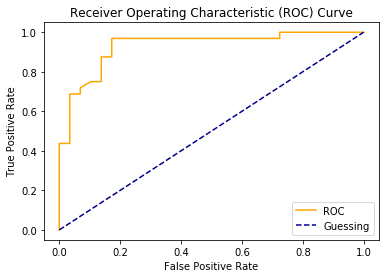

In [129]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)